### RNN for MNIST Classification

In [ ]:
import torch
from torch import nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [51]:
# Set the hyper parameters
n_epochs = 100           # number of epochs to train the model
batch_size = 64
time_step = 28           # rnn time step / image height
input_size = 28          # rnn input size / image width
lr = 0.001               # learning rate
DOWNLOAD_MNIST = True    # set to True if you have not downloaded the data before


In [52]:
# Mnist digital dataset
train_data = dsets.MNIST(
    root='./mnist/',
    train=True,                         # this is training data
    transform=transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to
                                        # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,            # download MNIST dataset if not done before
)

torch.Size([60000, 28, 28])
torch.Size([60000])


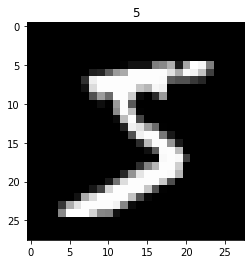

In [53]:
# plot one example
print(train_data.train_data.size())     # (60000, 28, 28)
print(train_data.train_labels.size())   # (60000)
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[0])
plt.show()

In [54]:
# Data Loader for easy mini-batch return in training
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

# convert test data into Variable, pick 2000 samples for testing
test_data = dsets.MNIST(root='./mnist/', train=False, transform=transforms.ToTensor())
test_x = test_data.test_data.type(torch.FloatTensor)[:2000]/255.   # shape (2000, 28, 28) value in range(0,1)
test_y = test_data.test_labels.numpy()[:2000]    # covert to numpy array

In [55]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()

        self.rnn = nn.LSTM(         # nn.RNN(), it hardly learns
            input_size=input_size,
            hidden_size=64,         # rnn hidden unit
            num_layers=1,           # number of rnn layer
            batch_first=True,       # input & output will have batch size as 1s dimension. e.g. (batch, time_step, input_size)
        )

        self.out = nn.Linear(64, 10)

    def forward(self, x):
        # x shape (batch, time_step, input_size)
        # r_out shape (batch, time_step, output_size)
        # h_n shape (n_layers, batch, hidden_size)
        # h_c shape (n_layers, batch, hidden_size)
        r_out, (h_n, h_c) = self.rnn(x, None)   # None represents zero initial hidden state

        # choose r_out at the last time step
        out = self.out(r_out[:, -1, :])
        return out


rnn = RNN()
print(rnn)


RNN(
  (rnn): LSTM(28, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)


In [57]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=lr)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

In [44]:
# training and testing
for epoch in range(n_epochs):
    for step, (b_x, b_y) in enumerate(train_loader):        # gives batch data
        b_x = b_x.view(-1, 28, 28)              # reshape x to (batch, time_step, input_size)

        output = rnn(b_x)                               # rnn output
        loss = loss_func(output, b_y)                   # cross entropy loss
        optimizer.zero_grad()                           # clear gradients for this training step
        loss.backward()                                 # backpropagation, compute gradients
        optimizer.step()                                # apply gradients

        if step % 50 == 0:
            test_output = rnn(test_x)                   # (samples, time_step, input_size)
            pred_y = torch.max(test_output, 1)[1].data.numpy()
            accuracy = float((pred_y == test_y).astype(int).sum()) / float(test_y.size)
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)

Epoch:  0 | train loss: 2.2980 | test accuracy: 0.12
Epoch:  0 | train loss: 2.1814 | test accuracy: 0.22
Epoch:  0 | train loss: 1.1798 | test accuracy: 0.60
Epoch:  0 | train loss: 0.9922 | test accuracy: 0.74
Epoch:  0 | train loss: 0.6417 | test accuracy: 0.79
Epoch:  0 | train loss: 0.5370 | test accuracy: 0.80
Epoch:  0 | train loss: 0.5835 | test accuracy: 0.83
Epoch:  0 | train loss: 0.3809 | test accuracy: 0.85
Epoch:  0 | train loss: 0.1992 | test accuracy: 0.85
Epoch:  0 | train loss: 0.3526 | test accuracy: 0.88
Epoch:  0 | train loss: 0.4373 | test accuracy: 0.88
Epoch:  0 | train loss: 0.5167 | test accuracy: 0.88
Epoch:  0 | train loss: 0.2831 | test accuracy: 0.88
Epoch:  0 | train loss: 0.2534 | test accuracy: 0.89
Epoch:  0 | train loss: 0.1998 | test accuracy: 0.89
Epoch:  0 | train loss: 0.1654 | test accuracy: 0.91
Epoch:  0 | train loss: 0.3691 | test accuracy: 0.91
Epoch:  0 | train loss: 0.2286 | test accuracy: 0.89
Epoch:  0 | train loss: 0.2731 | test accuracy

Epoch:  8 | train loss: 0.0164 | test accuracy: 0.97
Epoch:  8 | train loss: 0.1017 | test accuracy: 0.97
Epoch:  8 | train loss: 0.0163 | test accuracy: 0.97
Epoch:  8 | train loss: 0.0160 | test accuracy: 0.97
Epoch:  8 | train loss: 0.0283 | test accuracy: 0.97
Epoch:  8 | train loss: 0.0525 | test accuracy: 0.97
Epoch:  8 | train loss: 0.0426 | test accuracy: 0.97
Epoch:  8 | train loss: 0.0866 | test accuracy: 0.97
Epoch:  8 | train loss: 0.0149 | test accuracy: 0.97
Epoch:  8 | train loss: 0.0781 | test accuracy: 0.97
Epoch:  8 | train loss: 0.0213 | test accuracy: 0.97
Epoch:  8 | train loss: 0.0669 | test accuracy: 0.97
Epoch:  8 | train loss: 0.1781 | test accuracy: 0.97
Epoch:  8 | train loss: 0.0385 | test accuracy: 0.97
Epoch:  8 | train loss: 0.1066 | test accuracy: 0.97
Epoch:  8 | train loss: 0.0366 | test accuracy: 0.96
Epoch:  9 | train loss: 0.0116 | test accuracy: 0.97
Epoch:  9 | train loss: 0.1467 | test accuracy: 0.97
Epoch:  9 | train loss: 0.0534 | test accuracy

Epoch:  16 | train loss: 0.0097 | test accuracy: 0.98
Epoch:  16 | train loss: 0.0056 | test accuracy: 0.98
Epoch:  16 | train loss: 0.0068 | test accuracy: 0.98
Epoch:  16 | train loss: 0.0065 | test accuracy: 0.98
Epoch:  16 | train loss: 0.0337 | test accuracy: 0.98
Epoch:  16 | train loss: 0.0120 | test accuracy: 0.98
Epoch:  16 | train loss: 0.0042 | test accuracy: 0.98
Epoch:  16 | train loss: 0.0015 | test accuracy: 0.98
Epoch:  16 | train loss: 0.0320 | test accuracy: 0.98
Epoch:  16 | train loss: 0.0243 | test accuracy: 0.97
Epoch:  16 | train loss: 0.1326 | test accuracy: 0.98
Epoch:  16 | train loss: 0.0303 | test accuracy: 0.98
Epoch:  16 | train loss: 0.0673 | test accuracy: 0.98
Epoch:  16 | train loss: 0.0068 | test accuracy: 0.98
Epoch:  16 | train loss: 0.0189 | test accuracy: 0.98
Epoch:  17 | train loss: 0.0220 | test accuracy: 0.98
Epoch:  17 | train loss: 0.0245 | test accuracy: 0.98
Epoch:  17 | train loss: 0.0019 | test accuracy: 0.98
Epoch:  17 | train loss: 0.0

Epoch:  24 | train loss: 0.0034 | test accuracy: 0.98
Epoch:  24 | train loss: 0.0011 | test accuracy: 0.98
Epoch:  24 | train loss: 0.0075 | test accuracy: 0.98
Epoch:  24 | train loss: 0.0021 | test accuracy: 0.98
Epoch:  24 | train loss: 0.0015 | test accuracy: 0.98
Epoch:  24 | train loss: 0.0083 | test accuracy: 0.98
Epoch:  24 | train loss: 0.0132 | test accuracy: 0.98
Epoch:  24 | train loss: 0.0377 | test accuracy: 0.98
Epoch:  24 | train loss: 0.0087 | test accuracy: 0.98
Epoch:  24 | train loss: 0.0008 | test accuracy: 0.98
Epoch:  24 | train loss: 0.0188 | test accuracy: 0.98
Epoch:  24 | train loss: 0.0041 | test accuracy: 0.98
Epoch:  24 | train loss: 0.0080 | test accuracy: 0.98
Epoch:  24 | train loss: 0.0037 | test accuracy: 0.97
Epoch:  24 | train loss: 0.0168 | test accuracy: 0.97
Epoch:  25 | train loss: 0.0159 | test accuracy: 0.98
Epoch:  25 | train loss: 0.0271 | test accuracy: 0.98
Epoch:  25 | train loss: 0.0191 | test accuracy: 0.98
Epoch:  25 | train loss: 0.0

Epoch:  32 | train loss: 0.0030 | test accuracy: 0.97
Epoch:  32 | train loss: 0.0044 | test accuracy: 0.97
Epoch:  32 | train loss: 0.0040 | test accuracy: 0.98
Epoch:  32 | train loss: 0.0047 | test accuracy: 0.98
Epoch:  32 | train loss: 0.0024 | test accuracy: 0.98
Epoch:  32 | train loss: 0.0306 | test accuracy: 0.98
Epoch:  32 | train loss: 0.0499 | test accuracy: 0.98
Epoch:  32 | train loss: 0.0023 | test accuracy: 0.98
Epoch:  32 | train loss: 0.0009 | test accuracy: 0.98
Epoch:  32 | train loss: 0.0444 | test accuracy: 0.98
Epoch:  32 | train loss: 0.0282 | test accuracy: 0.98
Epoch:  32 | train loss: 0.0008 | test accuracy: 0.98
Epoch:  32 | train loss: 0.0025 | test accuracy: 0.98
Epoch:  32 | train loss: 0.0181 | test accuracy: 0.98
Epoch:  32 | train loss: 0.0008 | test accuracy: 0.98
Epoch:  33 | train loss: 0.0008 | test accuracy: 0.98
Epoch:  33 | train loss: 0.0005 | test accuracy: 0.98
Epoch:  33 | train loss: 0.1154 | test accuracy: 0.98
Epoch:  33 | train loss: 0.0

Epoch:  40 | train loss: 0.0027 | test accuracy: 0.98
Epoch:  40 | train loss: 0.0007 | test accuracy: 0.98
Epoch:  40 | train loss: 0.0352 | test accuracy: 0.97
Epoch:  40 | train loss: 0.0267 | test accuracy: 0.98
Epoch:  40 | train loss: 0.0039 | test accuracy: 0.98
Epoch:  40 | train loss: 0.0001 | test accuracy: 0.98
Epoch:  40 | train loss: 0.0135 | test accuracy: 0.98
Epoch:  40 | train loss: 0.0033 | test accuracy: 0.98
Epoch:  40 | train loss: 0.0075 | test accuracy: 0.98
Epoch:  40 | train loss: 0.0007 | test accuracy: 0.98
Epoch:  40 | train loss: 0.0009 | test accuracy: 0.98
Epoch:  40 | train loss: 0.0049 | test accuracy: 0.98
Epoch:  40 | train loss: 0.0053 | test accuracy: 0.98
Epoch:  40 | train loss: 0.0027 | test accuracy: 0.98
Epoch:  40 | train loss: 0.0227 | test accuracy: 0.98
Epoch:  41 | train loss: 0.0004 | test accuracy: 0.98
Epoch:  41 | train loss: 0.0005 | test accuracy: 0.98
Epoch:  41 | train loss: 0.0018 | test accuracy: 0.98
Epoch:  41 | train loss: 0.0

Epoch:  48 | train loss: 0.0001 | test accuracy: 0.98
Epoch:  48 | train loss: 0.0005 | test accuracy: 0.98
Epoch:  48 | train loss: 0.0001 | test accuracy: 0.98
Epoch:  48 | train loss: 0.0005 | test accuracy: 0.98
Epoch:  48 | train loss: 0.0010 | test accuracy: 0.98
Epoch:  48 | train loss: 0.0002 | test accuracy: 0.98
Epoch:  48 | train loss: 0.0002 | test accuracy: 0.98
Epoch:  48 | train loss: 0.0330 | test accuracy: 0.98
Epoch:  48 | train loss: 0.0004 | test accuracy: 0.98
Epoch:  48 | train loss: 0.0004 | test accuracy: 0.98
Epoch:  48 | train loss: 0.0001 | test accuracy: 0.98
Epoch:  48 | train loss: 0.0009 | test accuracy: 0.98
Epoch:  48 | train loss: 0.0009 | test accuracy: 0.98
Epoch:  48 | train loss: 0.0094 | test accuracy: 0.98
Epoch:  48 | train loss: 0.0199 | test accuracy: 0.98
Epoch:  49 | train loss: 0.0016 | test accuracy: 0.98
Epoch:  49 | train loss: 0.0062 | test accuracy: 0.98
Epoch:  49 | train loss: 0.0002 | test accuracy: 0.98
Epoch:  49 | train loss: 0.0

Epoch:  56 | train loss: 0.0000 | test accuracy: 0.98
Epoch:  56 | train loss: 0.0015 | test accuracy: 0.98
Epoch:  56 | train loss: 0.0008 | test accuracy: 0.98
Epoch:  56 | train loss: 0.0004 | test accuracy: 0.98
Epoch:  56 | train loss: 0.0225 | test accuracy: 0.98
Epoch:  56 | train loss: 0.0007 | test accuracy: 0.98
Epoch:  56 | train loss: 0.0002 | test accuracy: 0.98
Epoch:  56 | train loss: 0.0015 | test accuracy: 0.98
Epoch:  56 | train loss: 0.0005 | test accuracy: 0.98
Epoch:  56 | train loss: 0.0001 | test accuracy: 0.98
Epoch:  56 | train loss: 0.0045 | test accuracy: 0.98
Epoch:  56 | train loss: 0.0004 | test accuracy: 0.98
Epoch:  56 | train loss: 0.0023 | test accuracy: 0.98
Epoch:  56 | train loss: 0.0015 | test accuracy: 0.98
Epoch:  56 | train loss: 0.0037 | test accuracy: 0.98
Epoch:  57 | train loss: 0.0499 | test accuracy: 0.98
Epoch:  57 | train loss: 0.0029 | test accuracy: 0.98
Epoch:  57 | train loss: 0.0010 | test accuracy: 0.98
Epoch:  57 | train loss: 0.0

Epoch:  64 | train loss: 0.0002 | test accuracy: 0.98
Epoch:  64 | train loss: 0.0033 | test accuracy: 0.98
Epoch:  64 | train loss: 0.0002 | test accuracy: 0.98
Epoch:  64 | train loss: 0.0004 | test accuracy: 0.98
Epoch:  64 | train loss: 0.0003 | test accuracy: 0.98
Epoch:  64 | train loss: 0.0000 | test accuracy: 0.98
Epoch:  64 | train loss: 0.0006 | test accuracy: 0.98
Epoch:  64 | train loss: 0.0001 | test accuracy: 0.98
Epoch:  64 | train loss: 0.0040 | test accuracy: 0.98
Epoch:  64 | train loss: 0.0011 | test accuracy: 0.98
Epoch:  64 | train loss: 0.0064 | test accuracy: 0.98
Epoch:  64 | train loss: 0.0003 | test accuracy: 0.98
Epoch:  64 | train loss: 0.0015 | test accuracy: 0.98
Epoch:  64 | train loss: 0.0766 | test accuracy: 0.98
Epoch:  64 | train loss: 0.0001 | test accuracy: 0.98
Epoch:  65 | train loss: 0.0031 | test accuracy: 0.98
Epoch:  65 | train loss: 0.0058 | test accuracy: 0.98
Epoch:  65 | train loss: 0.0064 | test accuracy: 0.98
Epoch:  65 | train loss: 0.0

Epoch:  72 | train loss: 0.0003 | test accuracy: 0.98
Epoch:  72 | train loss: 0.0000 | test accuracy: 0.98
Epoch:  72 | train loss: 0.0013 | test accuracy: 0.98
Epoch:  72 | train loss: 0.0004 | test accuracy: 0.98
Epoch:  72 | train loss: 0.0042 | test accuracy: 0.98
Epoch:  72 | train loss: 0.0011 | test accuracy: 0.98
Epoch:  72 | train loss: 0.0044 | test accuracy: 0.98
Epoch:  72 | train loss: 0.0027 | test accuracy: 0.98
Epoch:  72 | train loss: 0.0001 | test accuracy: 0.98
Epoch:  72 | train loss: 0.0035 | test accuracy: 0.98
Epoch:  72 | train loss: 0.0005 | test accuracy: 0.98
Epoch:  72 | train loss: 0.0001 | test accuracy: 0.98
Epoch:  72 | train loss: 0.0030 | test accuracy: 0.98
Epoch:  72 | train loss: 0.0001 | test accuracy: 0.98
Epoch:  72 | train loss: 0.0000 | test accuracy: 0.98
Epoch:  73 | train loss: 0.0003 | test accuracy: 0.98
Epoch:  73 | train loss: 0.0001 | test accuracy: 0.98
Epoch:  73 | train loss: 0.0001 | test accuracy: 0.98
Epoch:  73 | train loss: 0.0

Epoch:  80 | train loss: 0.0001 | test accuracy: 0.98
Epoch:  80 | train loss: 0.0011 | test accuracy: 0.98
Epoch:  80 | train loss: 0.0000 | test accuracy: 0.98
Epoch:  80 | train loss: 0.0001 | test accuracy: 0.98
Epoch:  80 | train loss: 0.0001 | test accuracy: 0.98
Epoch:  80 | train loss: 0.0009 | test accuracy: 0.98
Epoch:  80 | train loss: 0.0002 | test accuracy: 0.98
Epoch:  80 | train loss: 0.0013 | test accuracy: 0.98
Epoch:  80 | train loss: 0.0030 | test accuracy: 0.98
Epoch:  80 | train loss: 0.0008 | test accuracy: 0.98
Epoch:  80 | train loss: 0.0110 | test accuracy: 0.98
Epoch:  80 | train loss: 0.0016 | test accuracy: 0.98
Epoch:  80 | train loss: 0.0045 | test accuracy: 0.98
Epoch:  80 | train loss: 0.0002 | test accuracy: 0.98
Epoch:  80 | train loss: 0.0043 | test accuracy: 0.98
Epoch:  81 | train loss: 0.0003 | test accuracy: 0.98
Epoch:  81 | train loss: 0.0003 | test accuracy: 0.98
Epoch:  81 | train loss: 0.0001 | test accuracy: 0.98
Epoch:  81 | train loss: 0.0

Epoch:  88 | train loss: 0.0002 | test accuracy: 0.98
Epoch:  88 | train loss: 0.0001 | test accuracy: 0.98
Epoch:  88 | train loss: 0.0001 | test accuracy: 0.98
Epoch:  88 | train loss: 0.0001 | test accuracy: 0.98
Epoch:  88 | train loss: 0.0004 | test accuracy: 0.98
Epoch:  88 | train loss: 0.0002 | test accuracy: 0.98
Epoch:  88 | train loss: 0.0009 | test accuracy: 0.98
Epoch:  88 | train loss: 0.0000 | test accuracy: 0.98
Epoch:  88 | train loss: 0.0005 | test accuracy: 0.98
Epoch:  88 | train loss: 0.0001 | test accuracy: 0.98
Epoch:  88 | train loss: 0.0008 | test accuracy: 0.98
Epoch:  88 | train loss: 0.0001 | test accuracy: 0.98
Epoch:  88 | train loss: 0.0002 | test accuracy: 0.98
Epoch:  88 | train loss: 0.0133 | test accuracy: 0.98
Epoch:  88 | train loss: 0.0025 | test accuracy: 0.98
Epoch:  89 | train loss: 0.0006 | test accuracy: 0.98
Epoch:  89 | train loss: 0.0005 | test accuracy: 0.98
Epoch:  89 | train loss: 0.0002 | test accuracy: 0.98
Epoch:  89 | train loss: 0.0

Epoch:  96 | train loss: 0.0004 | test accuracy: 0.98
Epoch:  96 | train loss: 0.0001 | test accuracy: 0.98
Epoch:  96 | train loss: 0.0003 | test accuracy: 0.98
Epoch:  96 | train loss: 0.0001 | test accuracy: 0.98
Epoch:  96 | train loss: 0.0002 | test accuracy: 0.98
Epoch:  96 | train loss: 0.0015 | test accuracy: 0.98
Epoch:  96 | train loss: 0.0000 | test accuracy: 0.98
Epoch:  96 | train loss: 0.0015 | test accuracy: 0.98
Epoch:  96 | train loss: 0.0002 | test accuracy: 0.98
Epoch:  96 | train loss: 0.0001 | test accuracy: 0.98
Epoch:  96 | train loss: 0.0465 | test accuracy: 0.98
Epoch:  96 | train loss: 0.0013 | test accuracy: 0.98
Epoch:  96 | train loss: 0.0001 | test accuracy: 0.98
Epoch:  96 | train loss: 0.0001 | test accuracy: 0.98
Epoch:  96 | train loss: 0.0000 | test accuracy: 0.98
Epoch:  97 | train loss: 0.0003 | test accuracy: 0.98
Epoch:  97 | train loss: 0.0001 | test accuracy: 0.98
Epoch:  97 | train loss: 0.0002 | test accuracy: 0.98
Epoch:  97 | train loss: 0.0

In [47]:
# print 10 predictions from test data
test_output = rnn(test_x[:10].view(-1, 28, 28))
pred_y = torch.max(test_output, 1)[1].data.numpy()
print(pred_y, 'Prediction')
print(test_y[:10], 'Truth')

[7 2 1 0 4 1 4 9 6 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number
